In [32]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
from scipy.fftpack import fft, fftshift
import sounddevice as sd
import winsound
from suaBibSignal import signalMeu
from scipy.io.wavfile import write
import soundfile as sf
import peakutils

In [33]:
frequencies = {}
frequencies[0] = [941, 1336]
frequencies[1] = [697, 1209]
frequencies[2] = [697, 1336]
frequencies[3] = [697, 1477]
frequencies[4] = [770, 1209]
frequencies[5] = [770, 1336]
frequencies[6] = [770, 1477]
frequencies[7] = [852, 1209]
frequencies[8] = [852, 1336]
frequencies[9] = [852, 1477]

index de picos [4246 6056]
freq de pico sao 849.2077025641956
freq de pico sao 1211.2109860406897
Número selecionado: 7


Text(0.5, 1.0, 'Fourier Audio')

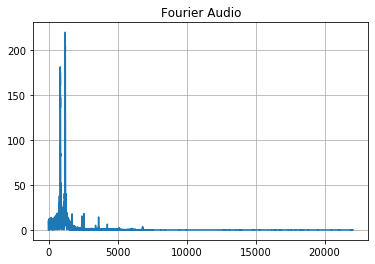

In [281]:
sbs = signalMeu()
fs = 44100
sd.default.samplerate = fs
sd.default.channels = 1
seconds = 5
myrecording = sd.rec(int(seconds * fs), samplerate=fs, channels=2)
sd.wait()
write('output.wav', fs, myrecording)

audio, samplerate = sf.read('output.wav')
yAudio = audio[:,1]
samplesAudio = len(yAudio)
sd.wait()

X, Y = sbs.calcFFT(yAudio, samplerate)
index = peakutils.indexes(np.abs(Y), thres=0.2, min_dist=500)
print("index de picos {}" .format(index))
for freq in X[index]:
    print("freq de pico sao {}" .format(freq))

for num in range(len(frequencies)):
    if (X[index][0] - 50) <= frequencies[num][0] <= (X[index][0] + 50):
        if (X[index][1] - 50) <= frequencies[num][1] <= (X[index][1] + 50):
            print("Número selecionado: {}".format(num))

plt.figure("Fourier Audio")
plt.plot(X, np.abs(Y))
plt.grid()
plt.title('Fourier Audio')